# Assignment - Multiple Linear Regression

# Model:1

## Loading Data

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.


In [1]:
import pandas as pd
import numpy as np

In [2]:
house_data=pd.read_csv("C:/Users/DELL/Downloads/House_data.csv")
house_data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
house_data.shape

(545, 13)

## Check info:

In [4]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
house_data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## Describe data:

In [6]:
house_data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## Plot pairplot:

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

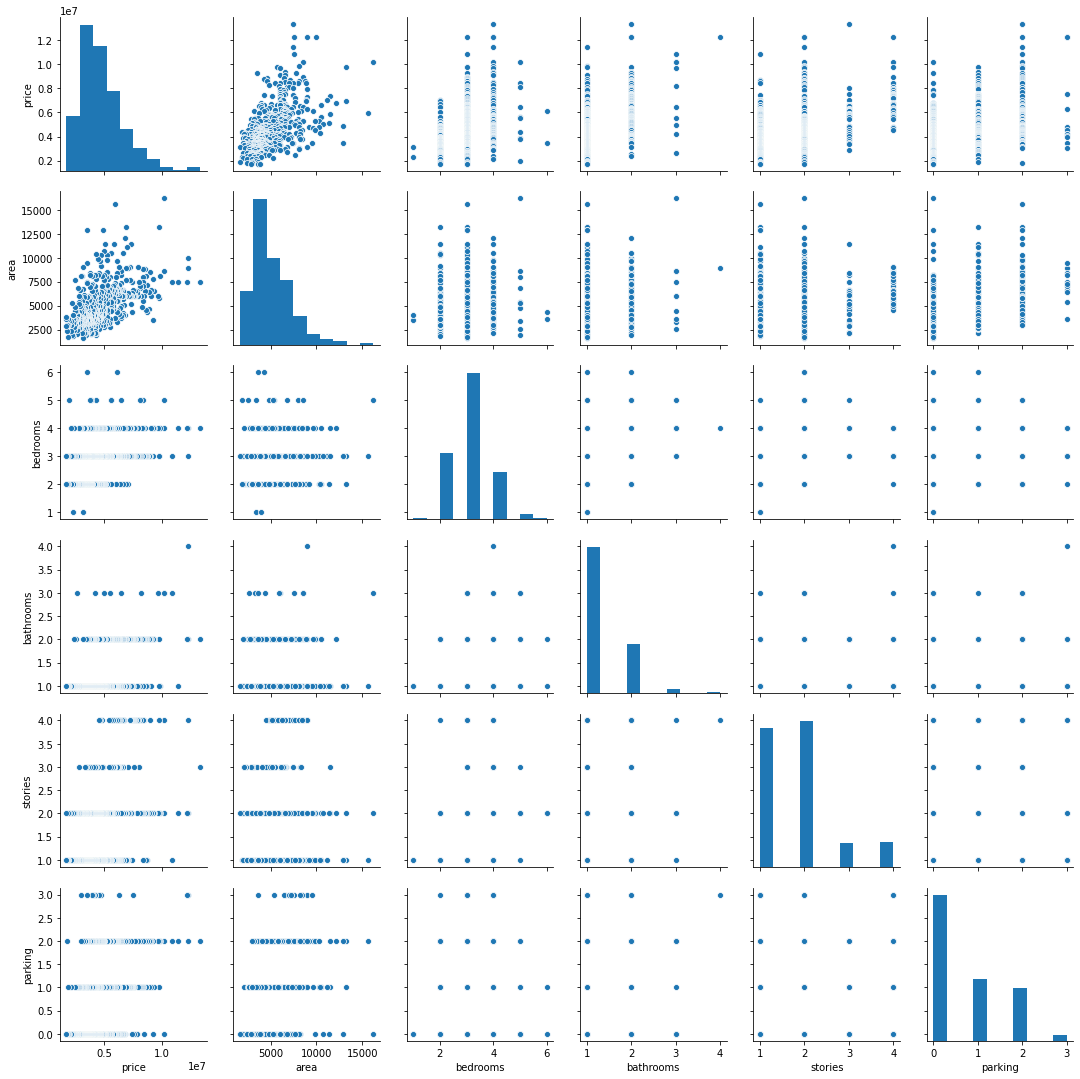

In [8]:
sns.pairplot(house_data) # plot pairplot for all numeric variables. 
plt.show()

In [9]:
var=['mainroad','guestroom', 'basement', 'hotwaterheating', 'airconditioning','prefarea']
house_data[var]=house_data[var].replace(to_replace={'yes':1,'no':0})
house_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [10]:
house_data['furnishingstatus']=house_data['furnishingstatus'].replace(to_replace={'furnished':1,'semi-furnished':2,'unfurnished':0})
house_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


# correlation Matrix:

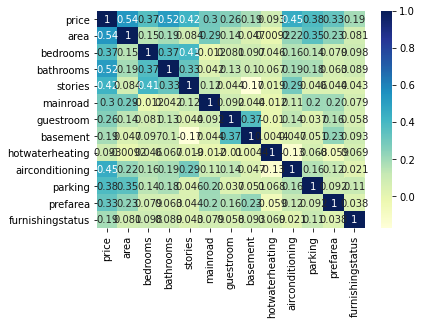

<Figure size 720x432 with 0 Axes>

In [11]:
sns.heatmap(house_data.corr(), cmap="YlGnBu", annot = True)
plt.figure(figsize=(10,6))
plt.show()

## Select one independent variable for modelling using corr:

As is visible from the pairplot and the heatmap, the variable area seems to be most correlated with price. So let's go ahead and perform simple linear regression using area as our feature variable.

## Seprate depenent and independent variable:

In [12]:
x = house_data['area'].values.reshape(-1,1)  # independent variable
y = house_data['price'].values.reshape(-1,1)   # dependent variable

In [13]:
print(x.shape)
print(y.shape)


(545, 1)
(545, 1)


## Split train test:

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [15]:
x_train.shape

(381, 1)

In [16]:
y_train.shape

(381, 1)

In [17]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
scaler = MinMaxScaler()

# transform training data
x_train_norm = scaler.fit_transform(x_train)

# transform testing dataabs
x_test_norm = scaler.fit_transform(x_test)

C:\Users\DELL\Anaconda3\conda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\DELL\Anaconda3\conda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [18]:
y_train_norm = scaler.fit_transform(y_train)
y_test_norm = scaler.fit_transform(y_test)

C:\Users\DELL\Anaconda3\conda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\DELL\Anaconda3\conda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


## Fit model:

In [19]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train_norm, y_train_norm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Check intercept,coefficient and interpret:

In [20]:
print(lm.intercept_)
print(lm.coef_)

[0.12689368]
[[0.46219199]]


In [21]:
coeff=pd.DataFrame(lm.coef_,columns=["Coefficient"])
coeff

,Coefficient
0,0.462192


## Predict test data:

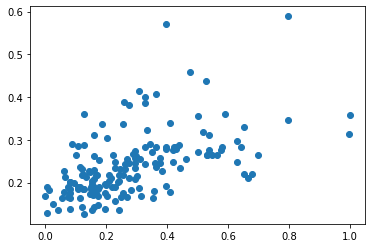

In [22]:
y_pred=lm.predict(x_test_norm)
plt.scatter(y_test_norm,y_pred)


In [23]:

d=pd.DataFrame({'Actual': y_test_norm.flatten(), 'Predicted': y_pred.flatten()})
d

,Actual,Predicted
0,0.247651,0.165966
1,0.530201,0.265075
2,0.328859,0.400683
3,0.261745,0.243474
4,0.245638,0.231721
...,...,...
159,0.154362,0.136423
160,0.308725,0.414374
161,0.221477,0.264598
162,0.546980,0.265075


## check MSE,RMSE,and interpret:

In [24]:
from sklearn import metrics
mae=metrics.mean_absolute_error(y_test_norm,y_pred)
mse=metrics.mean_squared_error(y_test_norm,y_pred)
rmse=np.sqrt(mse)
r_sq= metrics.r2_score(y_test_norm, y_pred)
print("Mean absolute error is:",mae)
print("Mean squared error is:",mse)
print(" Root Mean squared error is:",rmse)
print('R2 score is {}'.format(r_sq))

Mean absolute error is: 0.12069533510155063
Mean squared error is: 0.028092473996349142
 Root Mean squared error is: 0.16760809645225716
R2 score is 0.22159257994394188


# Model : 2

As is visible from the pairplot and the heatmap, the variable bathrooms and airconditioning seems to be correlated with price. So let's go ahead and perform linear regression using area, bathrooms,and airconditioning as our feature variable.

In [25]:
x = house_data[['area','bathrooms','airconditioning']]  # independent variable
y = house_data[['price']]   # dependent variable

In [26]:
print(x.shape)
print(y.shape)

(545, 3)
(545, 1)


## Split train test:

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [28]:
x_train.shape

(381, 3)

In [29]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
scaler = MinMaxScaler()

# transform training data
x_train_norm = scaler.fit_transform(x_train)

# transform testing dataabs
x_test_norm = scaler.fit_transform(x_test)

In [30]:
y_train_norm = scaler.fit_transform(y_train)
y_test_norm = scaler.fit_transform(y_test)

## Fit model:

In [31]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train_norm, y_train_norm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Check intercept,coefficient and interpret:

In [32]:
print(lm.intercept_)
print(lm.coef_)

[0.09475631]
[[0.35806059 0.2650438  0.0869856 ]]


## Predict test data:

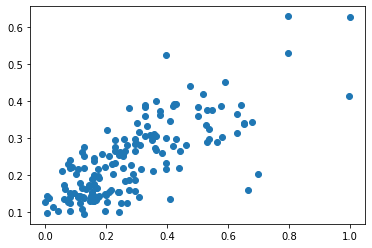

In [33]:
y_pred=lm.predict(x_test_norm)
plt.scatter(y_test_norm,y_pred)


## check MSE,RMSE,and interpret:

In [34]:
from sklearn import metrics
mae=metrics.mean_absolute_error(y_test_norm,y_pred)
mse=metrics.mean_squared_error(y_test_norm,y_pred)
rmse=np.sqrt(mse)
r_sq= metrics.r2_score(y_test_norm, y_pred)
print("Mean absolute error is:",mae)
print("Mean squared error is:",mse)
print(" Root Mean squared error is:",rmse)
print('R2 score is {}'.format(r_sq))

Mean absolute error is: 0.09615065849248731
Mean squared error is: 0.01906203813132753
 Root Mean squared error is: 0.13806534007971563
R2 score is 0.4718146958240419


# Model : 3


 As is visible from the pairplot and the heatmap, the variable stories and bedrooms  seems to be correlated with price. So let's go ahead and perform linear regression using area,bathrooms,aircondtitioning,stories,bedrooms as our feature variable.

In [35]:
x = house_data[['area','bathrooms','airconditioning','stories','bedrooms']]  # independent variable
y = house_data[['price']]   # dependent variable

In [36]:
print(x.shape)
print(y.shape)

(545, 5)
(545, 1)


## Split train test:

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [38]:
x_train.shape

(381, 5)

In [39]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
scaler = MinMaxScaler()

# transform training data
x_train_norm = scaler.fit_transform(x_train)

# transform testing dataabs
x_test_norm = scaler.fit_transform(x_test)

In [40]:
y_train_norm = scaler.fit_transform(y_train)
y_test_norm = scaler.fit_transform(y_test)

## Fit model:

In [41]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train_norm, y_train_norm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Check intercept,coefficient and interpret:


In [42]:
print(lm.intercept_)
print(lm.coef_)

[0.04425531]
[[0.35953373 0.21545624 0.06949428 0.1033579  0.08882096]]


## Predict test data:


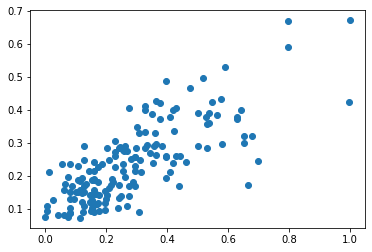

In [43]:
y_pred=lm.predict(x_test_norm)
plt.scatter(y_test_norm,y_pred)


In [44]:
d2=pd.DataFrame({'Actual': y_test_norm.flatten(), 'Predicted': y_pred.flatten()})
d2

,Actual,Predicted
0,0.247651,0.138709
1,0.530201,0.357117
2,0.328859,0.286840
3,0.261745,0.199001
4,0.245638,0.288960
...,...,...
159,0.154362,0.187547
160,0.308725,0.331942
161,0.221477,0.180981
162,0.546980,0.426023


# check MSE,RMSE,and interpret:

In [45]:
from sklearn import metrics
mae=metrics.mean_absolute_error(y_test_norm,y_pred)
mse=metrics.mean_squared_error(y_test_norm,y_pred)
rmse=np.sqrt(mse)
r_sq= metrics.r2_score(y_test_norm, y_pred)
print("Mean absolute error is:",mae)
print("Mean squared error is:",mse)
print(" Root Mean squared error is:",rmse)
print('R2 score is {}'.format(r_sq))

Mean absolute error is: 0.09442635837935498
Mean squared error is: 0.017672270130809974
 Root Mean squared error is: 0.132937090876888
R2 score is 0.5103234339259237
